# <b> Travel Insurance - Capstone Project III </b>
JCDSOL- 013_Erza Anandhika

<i><a href= "https://drive.google.com/drive/folders/1iVx5k6tWglqfHb05o0DElg8JHg7VVG_J"> Sumber Data Travel Insurance</a></i>

### Contents and Work Flow 
- Business Problem Understanding
- Data Understanding
- Data Preperation
    1.  Data Cleaning
    2.  Correlation Check (Feature Selection)
    3.  Preprocessing: Encoding & Scaling
- Create Pipeline
- Model Benchmarking
- Pick the best model for tuning
- Save the model to **Pickle**
- Create **Interface** for user to do an instant simulation

## <b>Business Problem Understanding</b>

<i>Context</i>

Travel insurance adalah jenis asuransi yang memberikan perlindungan saat seseorang melakukan perjalanan, baik domestik maupun internasional. Beberapa negara, seperti di Eropa dan Amerika, bahkan mengharuskan wisatawan untuk memiliki asuransi perjalanan. Besaran premi asuransi ini bergantung pada cakupan yang diinginkan, durasi perjalanan, serta tujuan perjalanan.

Dalam studi kasus ini, sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin memprediksi pemegang polis yang akan mengajukan klaim untuk cakupan tersebut. Data pemegang polis di perusahaan asuransi ini adalah data historis yang mencakup informasi seperti destinasi, produk asuransi, dan lain sebagainya.

<i>Problem Statement</i>

Perusahaan asuransi perjalanan ingin mengembangkan model prediksi yang mampu mengidentifikasi pemegang polis yang kemungkinan besar akan mengajukan klaim asuransi berdasarkan data historis yang mencakup informasi destinasi, produk asuransi, dan faktor relevan lainnya.

<i>Goals</i>

- Meningkatkan akurasi prediksi klaim asuransi perjalanan.
- Mengoptimalkan proses penilaian risiko dan penentuan premi.
- Meminimalisir potensi kerugian finansial akibat klaim tak terduga.
- Meningkatkan kepuasan dan kepercayaan pelanggan melalui penawaran yang lebih tepat sasaran.

<i>Metric Evaluation</i>
- True Negative: Pelanggan yang tidak mengajukan klaim dan seharusnya tidak menerima pembayaran klaim.
- False Negative: Pelanggan yang tidak mengajukan klaim tetapi seharusnya berhak menerima pembayaran klaim.
- False Positive: Pelanggan yang mengajukan klaim tetapi seharusnya tidak berhak menerima pembayaran klaim.
- True Positive: Pelanggan yang mengajukan klaim dan seharusnya berhak menerima pembayaran klaim.

Konsekuensi False Positive, model  akan mengidentifikasi beberapa pelanggan yang sebenarnya tidak memenuhi syarat untuk menerima klaim sebagai berhak menerima pembayaran klaim. Ini bisa berdampak pada biaya operasional perusahaan karena membayar klaim yang tidak semestinya, juga dapat meningkatkan risiko keuangan perusahaan karena meningkatnya jumlah klaim yang tidak valid.

Konsekuensi False Negative, model gagal mengidentifikasi beberapa pelanggan yang sebenarnya memenuhi syarat untuk menerima pembayaran klaim sebagai tidak memenuhi syarat. Ini dapat menghasilkan ketidakpuasan pelanggan, serta mungkin mengurangi kepercayaan pelanggan terhadap perusahaan asuransi. Selain itu, secara finansial, ini juga bisa berarti kehilangan pendapatan premi yang seharusnya dibayar oleh pelanggan yang sebenarnya memenuhi syarat.

### Import Important Library

In [1]:
# Library

import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_selector
import category_encoders as ce
from scipy.stats import stats, spearmanr, shapiro, mannwhitneyu, chi2_contingency

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectPercentile
from imblearn.pipeline import Pipeline as ImbPipeline 
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier 



# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

## <b>Data Understanding

| **Attribute**             | **Data Type** | **Description**                            |
|---------------------------|---------------|----------------------------------------------|
| Agency                    | Object        | Name of the travel insurance agency         |
| Agency Type               | Object        | Type of travel insurance agency             |
| Distribution Channel      | Object        | Channel of travel insurance agency          |
| Product Name              | Object        | Name of the travel insurance product        |
| Gender                    | Object        | Gender of the insured individual            |
| Duration                  | Integer       | Duration of the travel (in days)            |
| Destination               | Object        | Destination of the travel                   |
| Net Sales                 | Float         | Amount of sales of travel insurance policies |
| Commission (in value)     | Float         | Commission received for travel insurance agency |
| Age                       | Integer       | Age of the insured individual               |
| Claim                     | Object        | Claim status of the travel insurance policy |


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
df.shape

(44328, 11)

In [4]:
df.rename(columns={ 'Agency':'agency','Agency Type':'agency_type', 'Distribution Channel':'distribution_channel', 'Product Name':'product_name','Gender':'gender','Duration':'duration','Destination':'destination','Net Sales':'net_sales', 'Commision (in value)':'commision', 'Age':'age','Claim':'claim'},inplace=True)
df.head()

,agency,agency_type,distribution_channel,product_name,gender,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


### Numerik

In [5]:
df.describe()

,duration,net_sales,commision,age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


### Kategorikal

In [6]:
df.describe(exclude='number')

,agency,agency_type,distribution_channel,product_name,gender,destination,claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## Data Cleaning

In [7]:
df['claim'] = np.where(df['claim']=='Yes', 1, 0)

In [8]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,agency,object,0,0.00,16,"[KML, LWC]"
1,agency_type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,distribution_channel,object,0,0.00,2,"[Offline, Online]"
3,product_name,object,0,0.00,26,"[Travel Cruise Protect Family, Annual Travel P..."
4,gender,object,31647,71.39,2,"[nan, F]"
5,duration,int64,0,0.00,437,"[297, 318]"
6,destination,object,0,0.00,138,"[UKRAINE, ITALY]"
7,net_sales,float64,0,0.00,1006,"[69.05, 35.0]"
8,commision,float64,0,0.00,915,"[23.76, 0.56]"
9,age,int64,0,0.00,89,"[50, 64]"


### Missing Values

<Axes: >

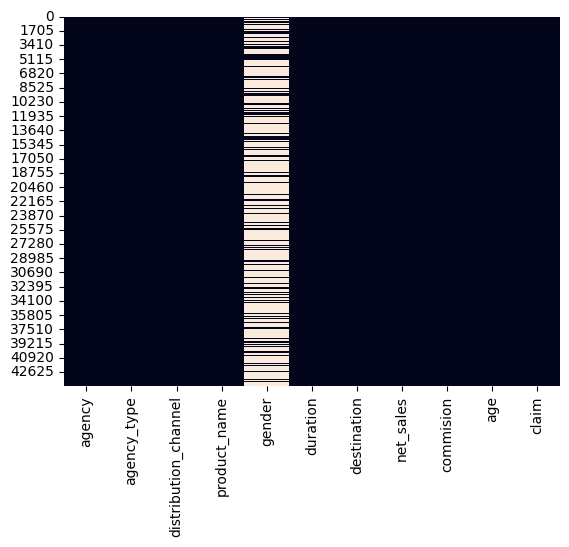

In [9]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.isna().sum()

agency                      0
agency_type                 0
distribution_channel        0
product_name                0
gender                  31647
duration                    0
destination                 0
net_sales                   0
commision                   0
age                         0
claim                       0
dtype: int64

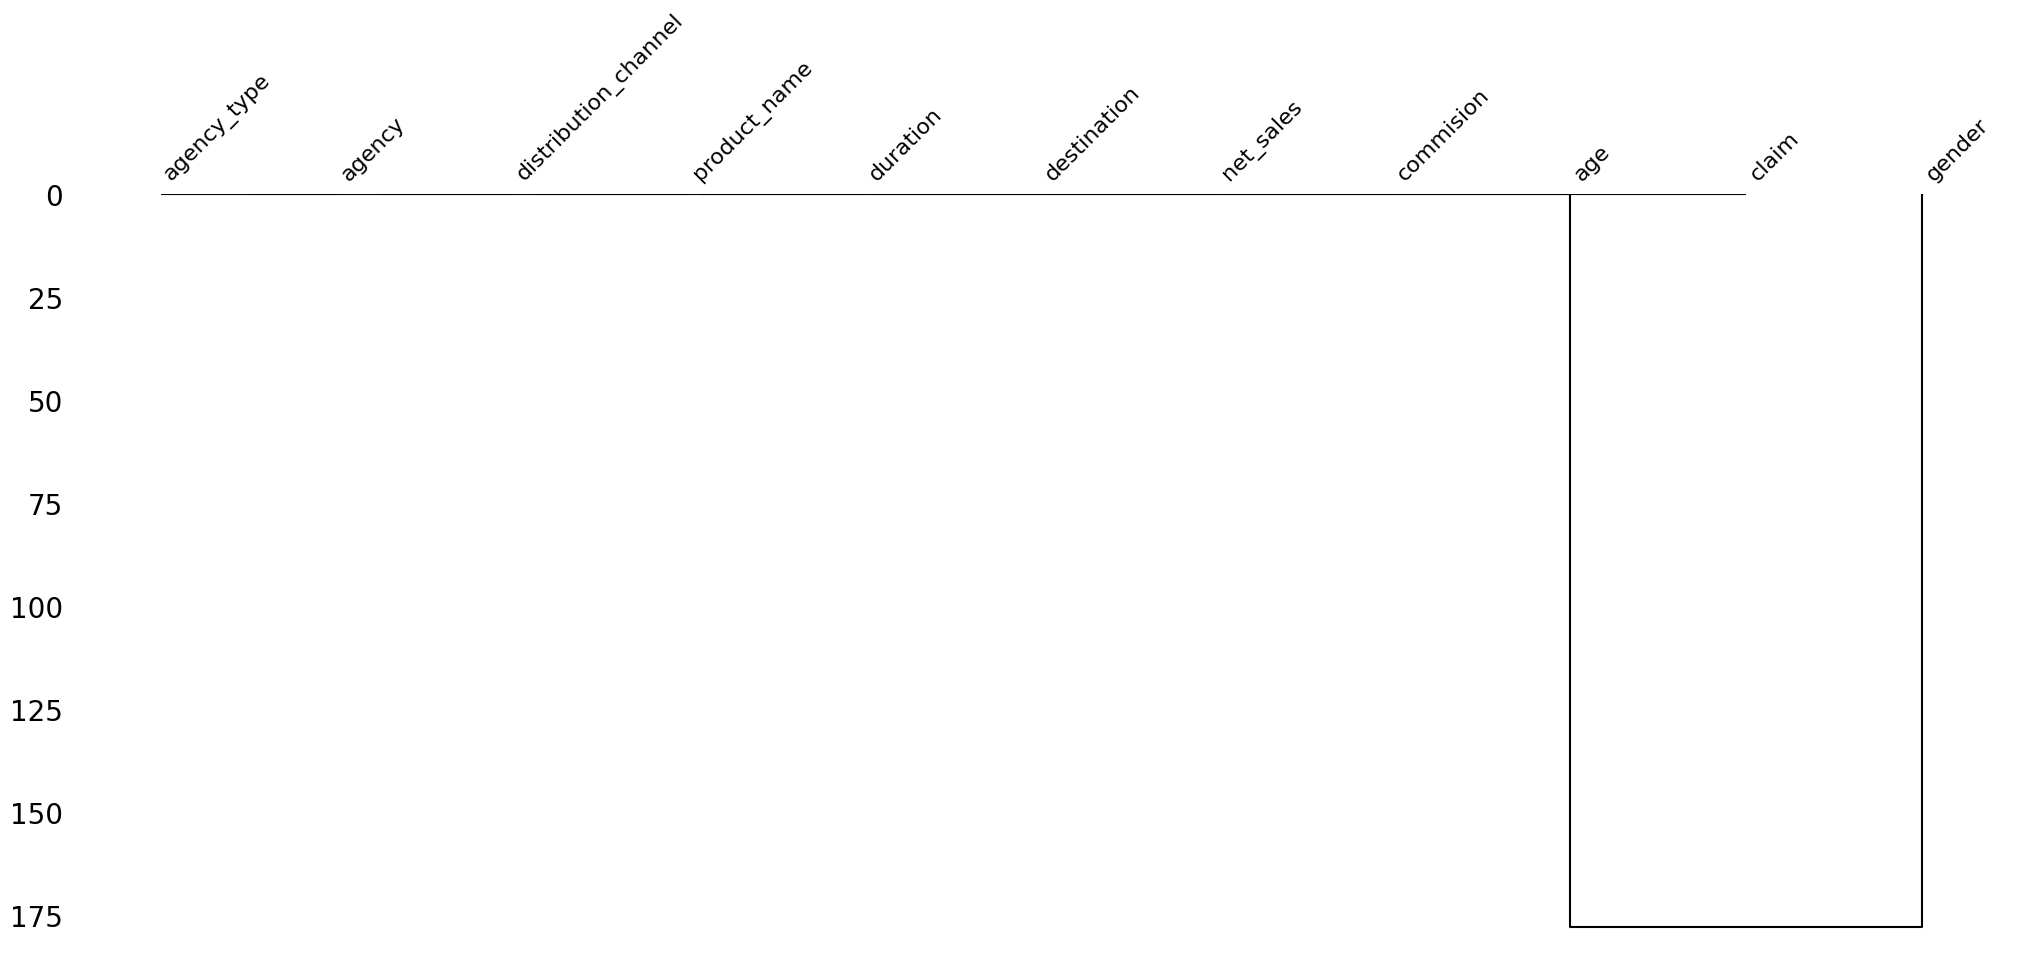

In [11]:
import missingno
import matplotlib.pyplot as plt

missingno.dendrogram(df)
plt.show()

In [12]:
pd.DataFrame({
    'age_group' : ['Child','Young Adults', 'Middle Aged Adults', 'Old Adults','Elderly'], 
    'age_range':['0-17', '18-30', '31-45', '45-55', '56 and above'],
    'missing_values':[
        df[(df['age']>=0) & (df['age']<=18)]['gender'].isna().sum(),
        df[(df['age']>17) & (df['age']<=30)]['gender'].isna().sum(),
        df[(df['age']>30) & (df['age']<=45)]['gender'].isna().sum(),
        df[(df['age']>45) & (df['age']<=55)]['gender'].isna().sum(),
        df[(df['age']>55)]['gender'].isna().sum(),
    ]
})

,age_group,age_range,missing_values
0,Child,0-17,1
1,Young Adults,18-30,3247
2,Middle Aged Adults,31-45,23447
3,Old Adults,45-55,3234
4,Elderly,56 and above,1718


In [13]:
df.drop(columns = 'gender', inplace =True)
df.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Data Duplicate

In [14]:
df.duplicated(keep='first').sum()

5004

In [15]:
# Menghapus data duplikat
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Outliers

In [16]:
df_model = df.copy()
print(df_model.shape)

(39324, 10)


In [17]:
df_model = df_model[df_model['duration'] < 547]
print(df_model.shape)
df_model.head()


(39309, 10)


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


In [18]:
df_model = df_model[df_model['age'] < 100]
print(df_model.shape)
df_model.head()

(38886, 10)


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


In [19]:
df_model = df_model.reset_index(drop=True)
print(df_model.shape)
df_model.head()
print(len(df))
print(len(df_model))

(38886, 10)
39324
38886


In [20]:
def outlier(df, columns):
    """
    Identify outliers in the specified columns of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    columns (list): List of column names to check for outliers.
    
    Returns:
    tuple: A tuple containing the lower and upper bounds, the number of outliers, and a set of outlier indices.
    """
    # Initialize an empty set to hold indices of rows that contain outliers
    outlier_index = []
    
    # Iterate through each specified column in the DataFrame
    for column in columns:
        # Calculate Q1, Q3, IQR, lower, and upper bounds for the current column
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        limit = iqr * 1.5
        
        lower_bound = q1 - limit
        upper_bound = q3 + limit
        
        # Identify outliers in the current column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outlier_index = outliers.index
        
        # Count the number of outliers in the current column
        num_outliers = len(outliers)
        
        # Print outlier information for the current column
        print(f'=====Outliers in {column}=====')
        print(f'IQR: {iqr}')
        print(f'Lower limit: {lower_bound}')
        print(f'Upper limit: {upper_bound}')
        print(f'Total number of outliers in column "{column}": {num_outliers}')
    
    # Return the lower bound, upper bound, and the set of outlier indices
    return lower_bound, upper_bound, num_outliers, outlier_index

In [21]:
result = outlier(df_model, df_model.select_dtypes(include = 'number').drop(columns = 'claim'))
result_list = list(result)

=====Outliers in duration=====
IQR: 46.0
Lower limit: -58.0
Upper limit: 126.0
Total number of outliers in column "duration": 3407
=====Outliers in net_sales=====
IQR: 30.5
Lower limit: -26.75
Upper limit: 95.25
Total number of outliers in column "net_sales": 3525
=====Outliers in commision=====
IQR: 11.88
Lower limit: -17.82
Upper limit: 29.700000000000003
Total number of outliers in column "commision": 3929
=====Outliers in age=====
IQR: 10.0
Lower limit: 19.0
Upper limit: 59.0
Total number of outliers in column "age": 2321


In [22]:
df_model.isnull().sum()

agency                  0
agency_type             0
distribution_channel    0
product_name            0
duration                0
destination             0
net_sales               0
commision               0
age                     0
claim                   0
dtype: int64

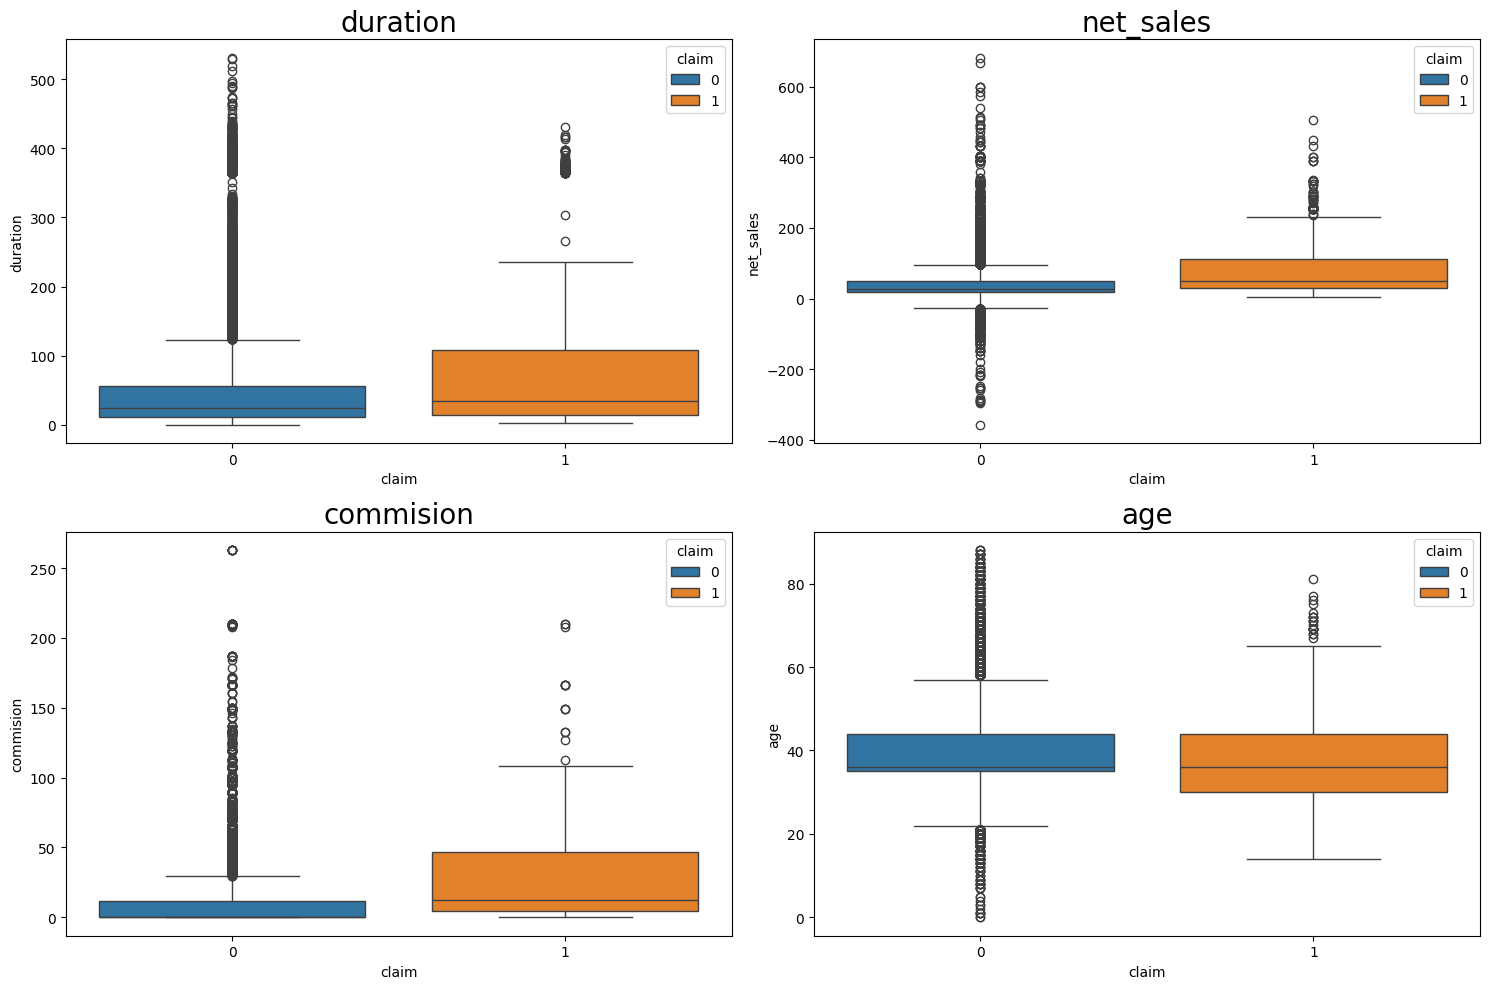

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plotnumber = 1
num_feature = df_model.select_dtypes(include = 'number').drop(columns='claim').columns

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data=df_model, y=feature, x='claim',hue = 'claim')
    plt.title(feature, fontsize = 20)
    plotnumber +=1
    plt.tight_layout()

### Summary Data Understanding dan Data Cleaning

- Dataseet terdiri dari 3886 data dengan 10 features yang menjadi referensi fitur ke varriabel target yaitu claim Yes = 1, dan No = 0
- Kolom Gender mengandung 70% missing values, dengan kondisi ini maka lebih baik melakukan drop fitur gender
- Pada beberapa fitur terdeteksi outliers, outliers ini akan diuji normalitas terlebih dahulu dan setelah itu dapat ditangani dengan Robust Scaler
- Terdapat data imbalance pada variabel target, dengan claim 'Yes' = 1 sebagai kelas minoritas, dan claim 'No' sebagai kelas mayoritas  

## Exploratory Data Analysis

### Numerical

In [24]:
df_model['claim'].value_counts()

claim
0    38220
1      666
Name: count, dtype: int64

<Axes: xlabel='claim', ylabel='count'>

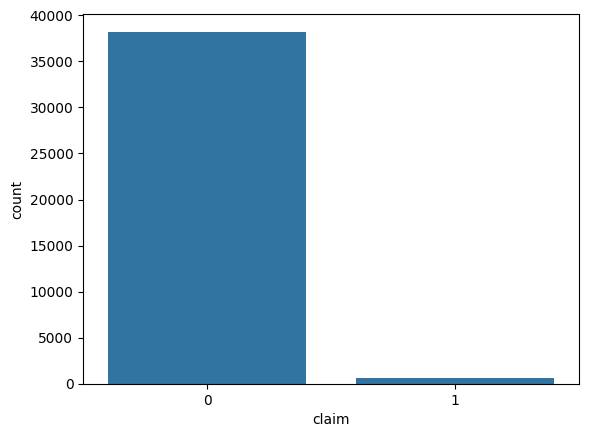

In [25]:
sns.countplot(data=df_model, x = 'claim')

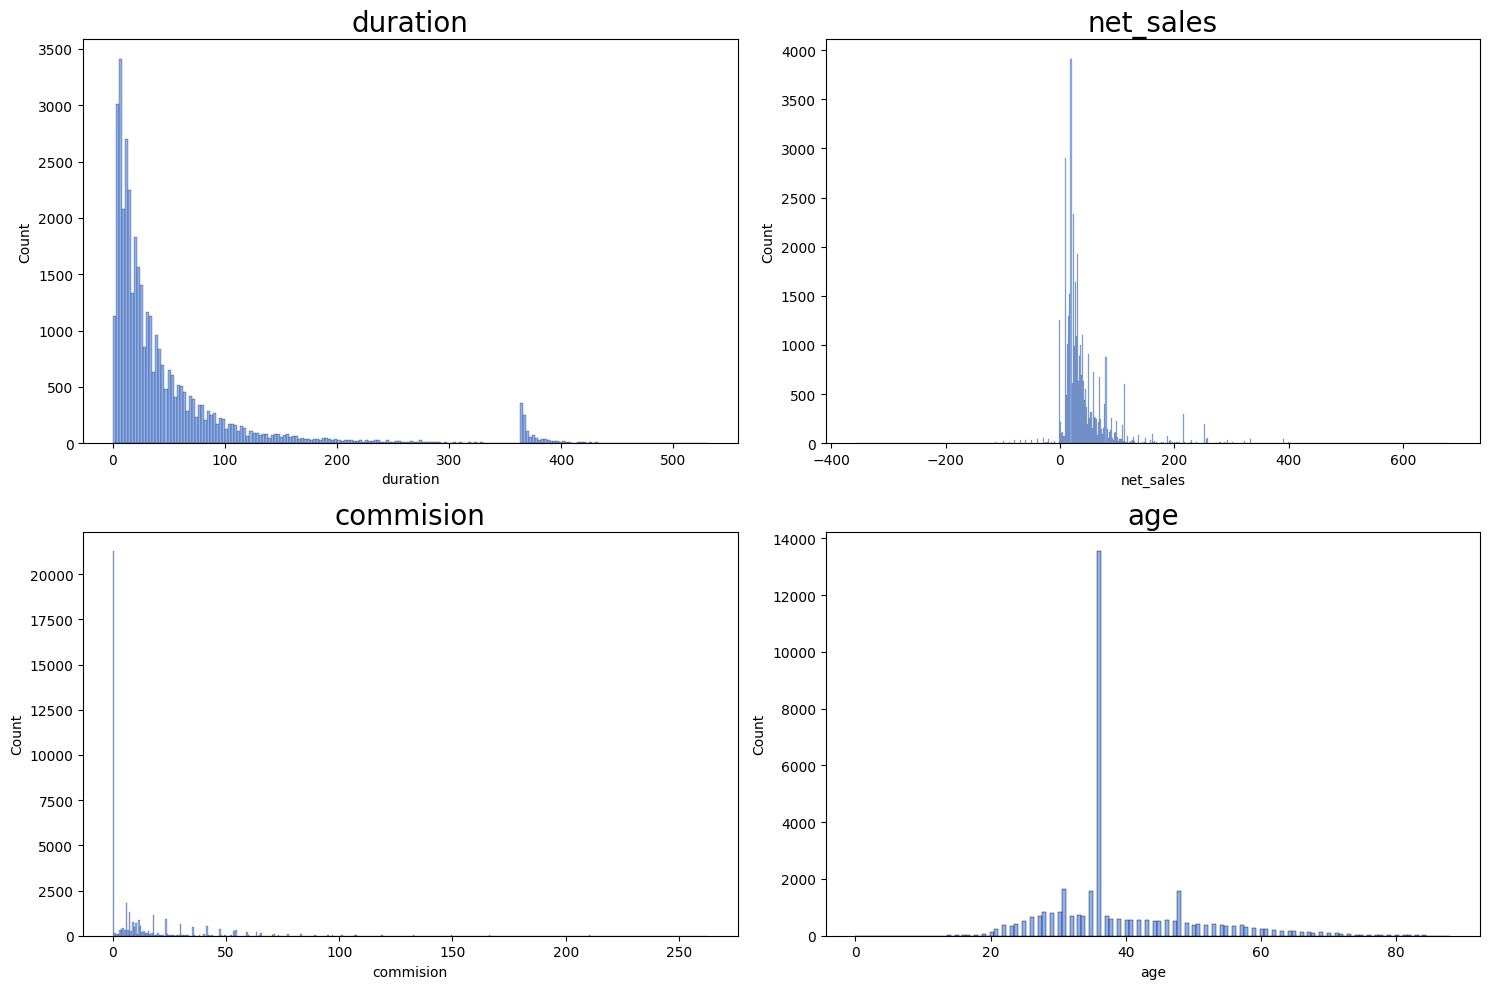

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plotnumber = 1
num_feature = df_model.select_dtypes(include = 'number').drop(columns='claim').columns

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(data=df_model, x=feature, color='cornflowerblue')
    plt.title(feature, fontsize = 20)
    plotnumber +=1
    plt.tight_layout()

In [27]:
df_model['duration'].value_counts().head(10)

duration
6     1182
5     1137
7     1122
8     1110
10    1040
9     1039
4     1000
11     989
12     888
3      877
Name: count, dtype: int64

In [28]:
df_model['net_sales'].value_counts().head(10)

net_sales
20.0    2929
10.0    2171
22.0    1529
0.0     1236
18.0    1028
26.0     996
30.0     893
29.7     852
80.0     822
39.6     717
Name: count, dtype: int64

In [29]:
df_model['commision'].value_counts().head(10)

commision
0.00     21027
7.70      1083
17.82     1016
23.76      852
6.30       718
11.88      684
29.70      633
9.10       610
10.50      568
41.58      497
Name: count, dtype: int64

In [30]:
df_model['age'].value_counts().head(10)

age
36    13554
31     1663
48     1582
35     1574
30      851
28      840
29      811
33      719
32      703
27      697
Name: count, dtype: int64

### Kategorik

In [31]:
df.describe(include='O')

,agency,agency_type,distribution_channel,product_name,destination
count,39324,39324,39324,39324,39324
unique,16,2,2,26,138
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,20990,28096,38613,11009,8106


<Figure size 2500x1500 with 0 Axes>

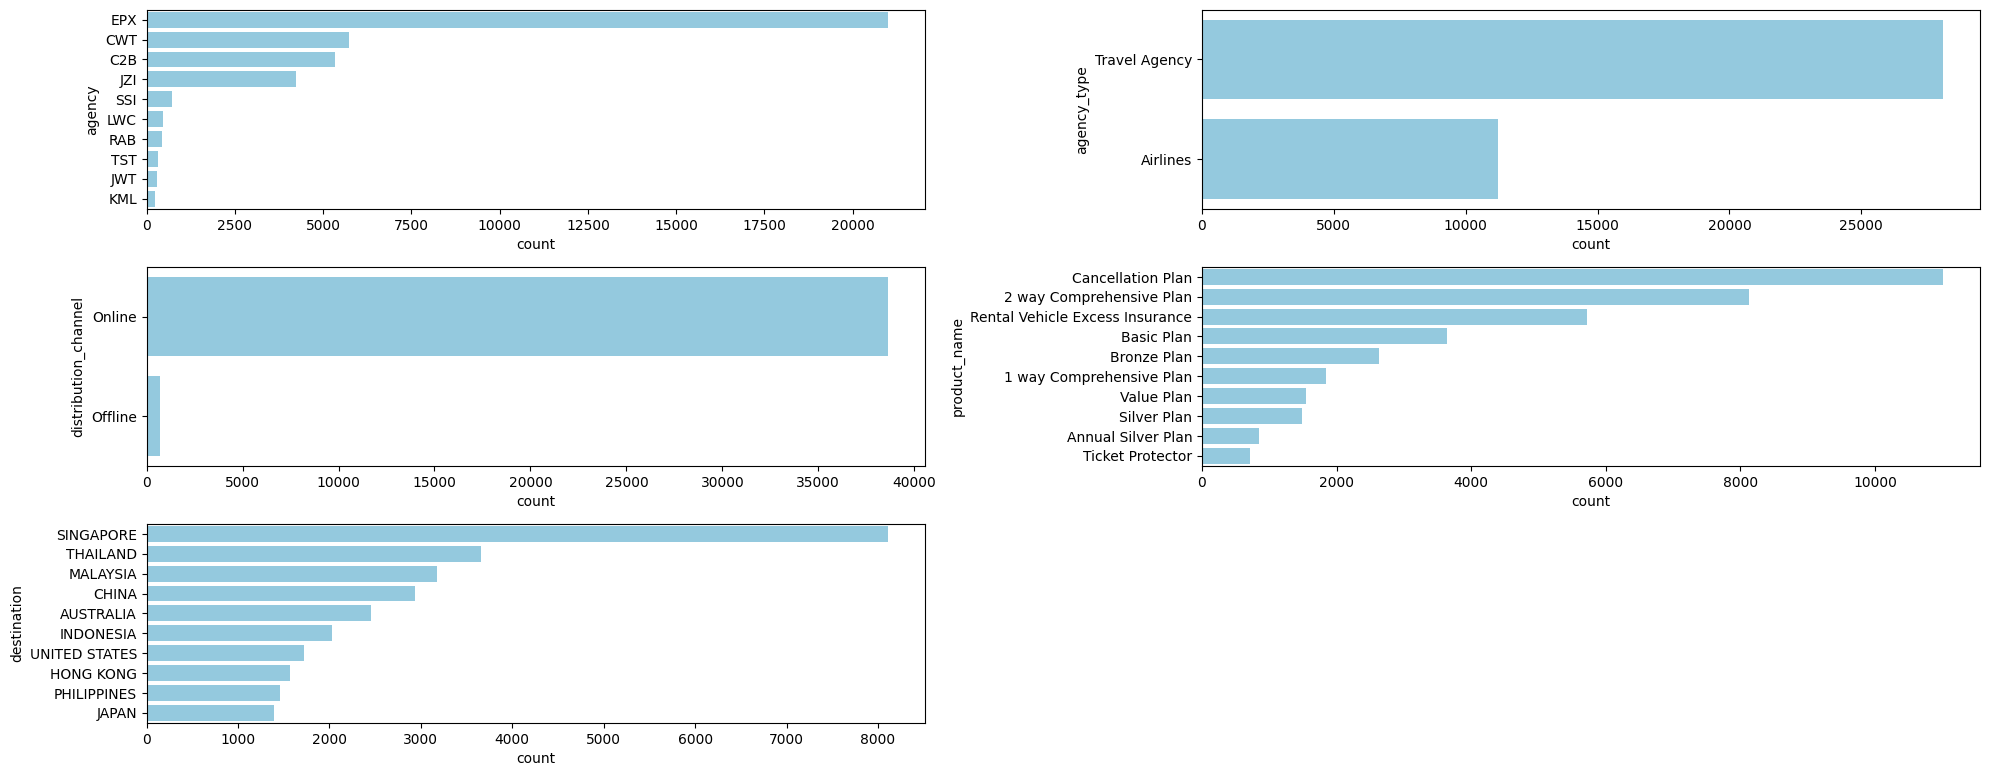

In [32]:
plt.figure(figsize=(25,15))
count = 0
fig = plt.figure(figsize=(20,10))
for kolom in df.select_dtypes(exclude='number').columns:
    count += 1
    plt.subplot(4,2,count)
    sns.countplot(y = kolom, data = df.select_dtypes(exclude='number'), order = df.select_dtypes(exclude='number')[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

### Peta Destinasi

In [33]:
shape = pd.read_csv('world-administrative-boundaries.csv',delimiter=';')
shape.sort_values(by = 'English Name').head()

,Geo Point,Geo Shape,ISO 3 territory code,Status,ISO 3 country code,English Name,Continent of the territory,Region of the territory,ISO 3166-1 Alpha 2-Codes,French Name
112,"9.767584545477694, 28.39877462510127","{""coordinates"": [[[28.04212659400003, 9.343691...",NaN,NaN,NaN,Abyei,Africa,Northern Africa,NaN,Abyei
215,"33.838805716206636, 66.0264706677288","{""coordinates"": [[[74.91574000000008, 37.23733...",AFG,Member State,AFG,Afghanistan,Asia,Southern Asia,AF,Afghanistan
135,"35.03382308522889, 79.12704701021674","{""coordinates"": [[[78.94845000000004, 33.37895...",NaN,Sovereignty unsettled JammuK-China,XXY,Aksai Chin,Asia,Eastern Asia,NaN,Aksai Chin
254,"41.142284823416894, 20.068384605918776","{""coordinates"": [[[20.071420000000046, 42.5609...",ALB,Member State,ALB,Albania,Europe,Southern Europe,AL,Albanie
23,"28.163239267304466, 2.6323881691928235","{""coordinates"": [[[8.622030000000052, 36.94137...",DZA,Member State,DZA,Algeria,Africa,Northern Africa,DZ,Algérie


In [34]:
shape['English Name'].sort_values().unique()

array(['Abyei', 'Afghanistan', 'Aksai Chin', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Arunachal Pradesh', 'Australia', 'Austria', 'Azerbaijan',
       'Azores Islands', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island',
       'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democra

In [35]:
replacement_dict = {
    'United States of America': 'United States',
    'U.K. of Great Britain and Northern Ireland': 'United Kingdom'
}

# Replace the values in the 'English Name' column according to the dictionary
shape['English Name'] = shape['English Name'].replace(replacement_dict)
shape['English Name'] = shape['English Name'].str.upper()

In [36]:
destination = pd.DataFrame(df['destination'].value_counts().sort_values(ascending=False)).reset_index().rename(columns={'destination':'country'})
destination.head(10)

,country,count
0,SINGAPORE,8106
1,THAILAND,3659
2,MALAYSIA,3173
3,CHINA,2931
4,AUSTRALIA,2453
5,INDONESIA,2029
6,UNITED STATES,1723
7,HONG KONG,1570
8,PHILIPPINES,1461
9,JAPAN,1395


In [37]:
destination['country'].sort_values().unique()

array(['ANGOLA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA', 'AUSTRIA',
       'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH', 'BELARUS', 'BELGIUM',
       'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI DARUSSALAM', 'BULGARIA', 'CAMBODIA', 'CAMEROON', 'CANADA',
       'CAYMAN ISLANDS', 'CHILE', 'CHINA', 'COLOMBIA', 'COSTA RICA',
       'CROATIA', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'ESTONIA', 'ETHIOPIA',
       'FAROE ISLANDS', 'FIJI', 'FINLAND', 'FRANCE', 'FRENCH POLYNESIA',
       'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GUADELOUPE', 'GUAM',
       'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HONG KONG', 'HUNGARY',
       'ICELAND', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REPUBLIC OF',
       'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN',
       'KAZAKHSTAN', 'KENYA', "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
       'KOREA, REPUBLIC OF', 'KUWAIT', 'KYRGYZSTAN',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'LATVIA', 

In [38]:
map = pd.merge(
    left = shape,
    right = destination,
    left_on = 'English Name',
    right_on = 'country',
    how = 'right'
)

map

,Geo Point,Geo Shape,ISO 3 territory code,Status,ISO 3 country code,English Name,Continent of the territory,Region of the territory,ISO 3166-1 Alpha 2-Codes,French Name,country,count
0,"1.3516148228449165, 103.8080509453779","{""coordinates"": [[[103.95997000000006, 1.32083...",SGP,Member State,SGP,SINGAPORE,Asia,South-Eastern Asia,SG,Singapour,SINGAPORE,8106
1,"15.127035821032173, 101.0173609470801","{""coordinates"": [[[[99.66804000000008, 6.49639...",THA,Member State,THA,THAILAND,Asia,South-Eastern Asia,TH,Thaïlande,THAILAND,3659
2,"3.7923669015472297, 109.7081944595275","{""coordinates"": [[[[111.41152000000005, 2.3763...",MYS,Member State,MYS,MALAYSIA,Asia,South-Eastern Asia,MY,Malaisie,MALAYSIA,3173
3,"36.56790870229093, 103.9040560317203","{""coordinates"": [[[[110.71583000000004, 20.068...",CHN,Member State,CHN,CHINA,Asia,Eastern Asia,CN,Chine,CHINA,2931
4,"-25.734968241934748, 134.48956247309874","{""coordinates"": [[[[158.8821700000001, -54.711...",AUS,Member State,AUS,AUSTRALIA,Oceania,Australia and New Zealand,AU,Australie,AUSTRALIA,2453
...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIBET,1
134,"5.685952200319196, 12.74359416002904","{""coordinates"": [[[15.499010000000055, 7.52661...",CMR,Member State,CMR,CAMEROON,Africa,Middle Africa,CM,Cameroun,CAMEROON,1
135,"14.366965745226873, -14.467653621117616","{""coordinates"": [[[-12.244829999999922, 14.764...",SEN,Member State,SEN,SENEGAL,Africa,Western Africa,SN,Sénégal,SENEGAL,1
136,"38.52817773320961, 71.04200446155443","{""coordinates"": [[[70.98204000000004, 40.24484...",TJK,Member State,TJK,TAJIKISTAN,Asia,Central Asia,TJ,Tadjikistan,TAJIKISTAN,1


In [39]:
map.dropna(inplace=True)

In [40]:
map.shape

(128, 12)

In [41]:
import plotly.express as px

import plotly.express as px

# Create a choropleth map with customizations
fig = px.choropleth(
    map,
    locations='ISO 3 territory code',
    locationmode='ISO-3',  # Specify ISO 3 letter codes
    color='count',
    color_continuous_scale='YlGnBu',  # Choose a color scale you prefer
    title='World Map with Data Using ISO Country Codes', 
    labels={'country': 'Value'},  # Customize the label of the colorbar
    hover_name='English Name'
)

# Customize the layout for a more visually pleasing look
fig.update_layout(
    geo=dict(
        showframe=True,  # Show frame around the map
        showcoastlines=True,  # Show coastlines
        projection_type='natural earth'  # Use a natural earth projection
    ),
    coloraxis_colorbar=dict(
        title='Sum',  # Set the title for the colorbar
        thicknessmode='fraction',
        thickness=0.03,
        lenmode='fraction',
        len=0.75,
        xanchor='left',
        x=0.98
    ),
    font=dict(
        size=12,  # Font size for better readability
        family='Arial'
    ),
    width=1000,  # Adjust the width of the map
    height=600,  # Adjust the height of the map
    title_font_size=18  # Set the title font size
)

# Show the map
fig.show()


## **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

Berdasarkan hasil coding di atas terlihat adanya nan value. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

#### Data Correlation

In [42]:
df_model.select_dtypes(include='number').corr()

,duration,net_sales,commision,age,claim
duration,1.000000,0.582586,0.465572,0.020070,0.099798
net_sales,0.582586,1.000000,0.631739,0.026598,0.137611
commision,0.465572,0.631739,1.000000,0.101590,0.102061
age,0.020070,0.026598,0.101590,1.000000,-0.015423
claim,0.099798,0.137611,0.102061,-0.015423,1.000000


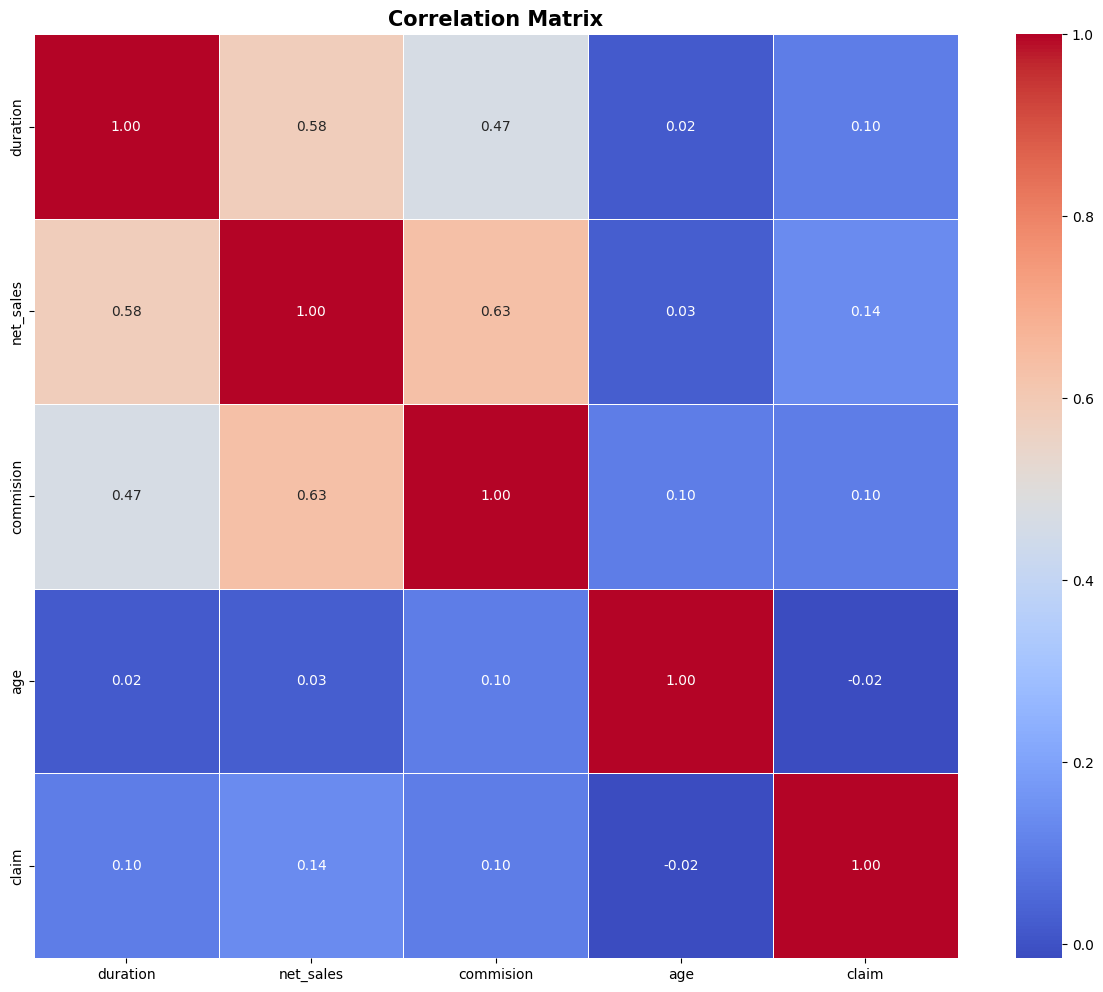

In [43]:
plt.figure(figsize = (15,12))
corr = df_model.select_dtypes(include='number').corr()
sns.heatmap(df_model.select_dtypes(include='number').corr(),annot=True,fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

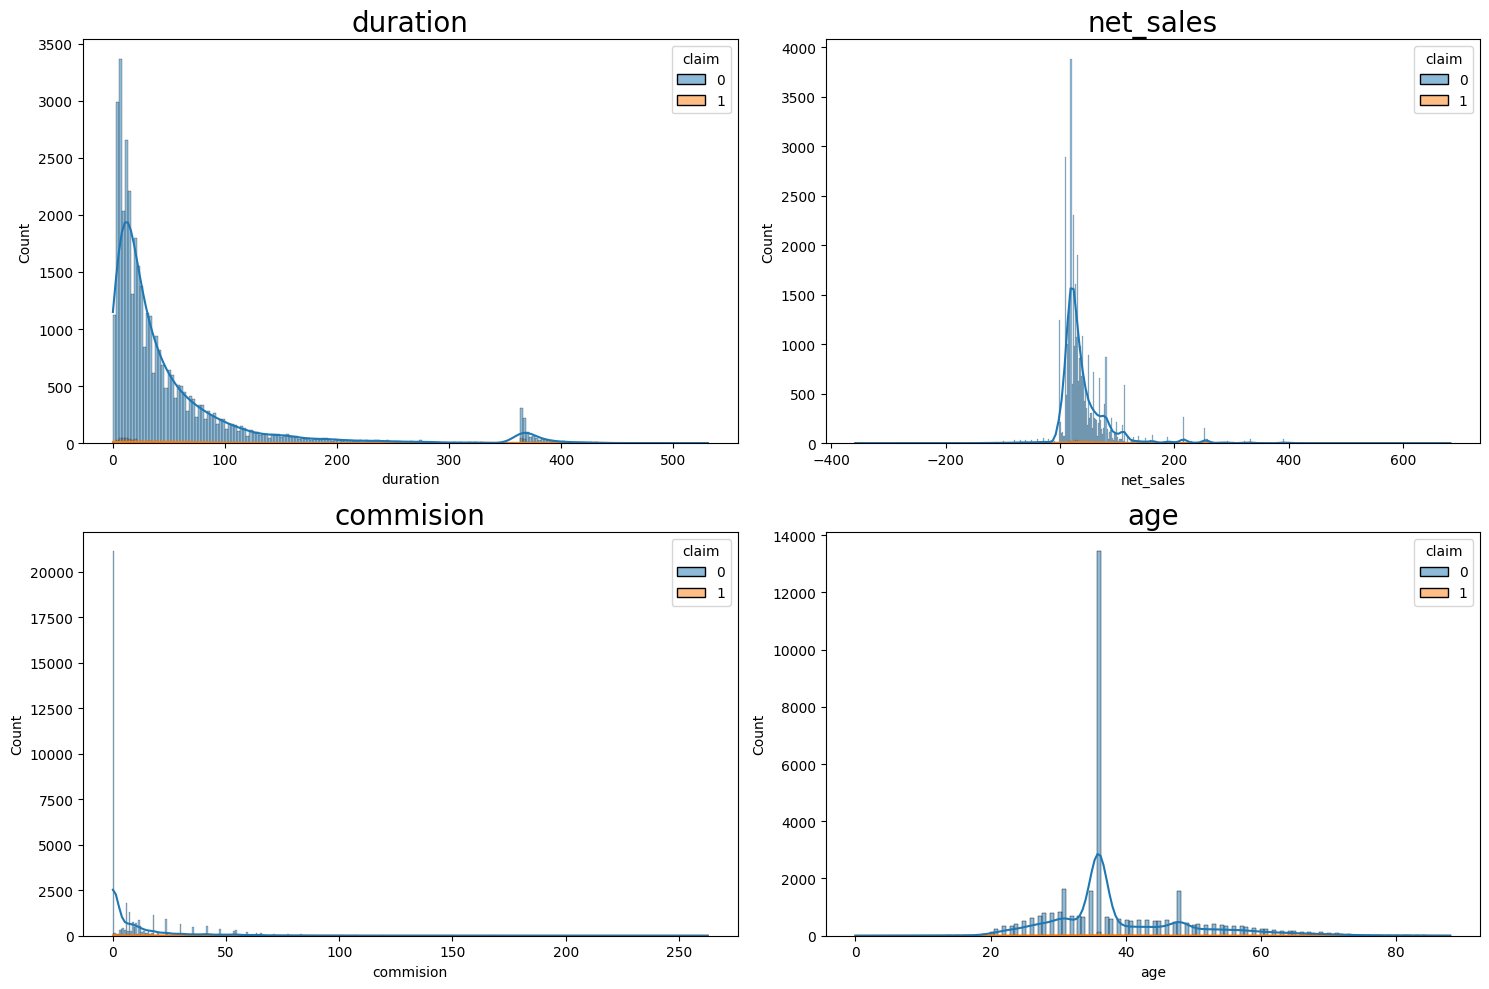

In [44]:
plt.figure(figsize=(15,10))
plotnumber = 1
num_feature = df_model.select_dtypes(include = 'number').drop(columns = 'claim').columns

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(data=df_model, x=feature, color='cornflowerblue',kde=True, hue = 'claim')
    plt.title(feature, fontsize = 20)
    plotnumber +=1
    plt.tight_layout()

#### Data Imbalance

In [45]:
(df['claim'].value_counts()/len(df))*100

claim
0    98.288577
1     1.711423
Name: count, dtype: float64

## Data Preparation

In [46]:
df['claim'].value_counts()

claim
0    38651
1      673
Name: count, dtype: int64

In [47]:
df_model.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Normality Test

#### Claim

In [48]:
shapiro_test = shapiro(df_model['claim'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.10693181205830626 p-value: 1.5726740904940073e-152
Tidak berdistribusi normal (reject H0)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38886.



#### Duration

In [49]:
shapiro_test = shapiro(df_model['duration'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.604521985538162 p-value: 6.414762601629087e-128
Tidak berdistribusi normal (reject H0)


#### age

In [50]:
shapiro_test = shapiro(df_model['age'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.895757272198757 p-value: 2.290249139404063e-92
Tidak berdistribusi normal (reject H0)


### Correlation Test

#### numerik

claim        1.000000
net_sales    0.137611
commision    0.102061
duration     0.099798
age         -0.015423
Name: claim, dtype: float64


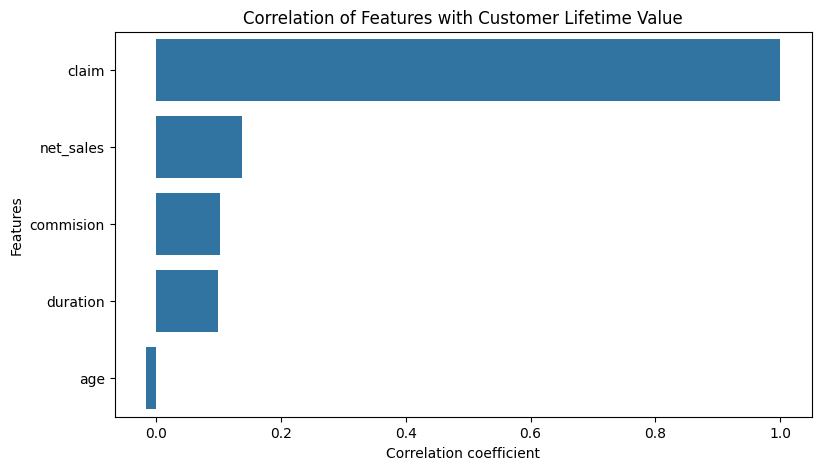

In [51]:
numcorr = corr['claim'].sort_values(ascending=False)
print(numcorr)

plt.figure(figsize=(9,5))
sns.barplot(x=numcorr.values,y=numcorr.index)
plt.title('Correlation of Features with Customer Lifetime Value')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

In [52]:
for col in numcorr.index:
    corr, p_value = spearmanr(df[col], df['claim'])
    significance = 'significant' if p_value < 0.05 else 'not significant'
    print(f"{col} vs claim:\nCorrelation: {corr:.4f} | P-value: {p_value:.4g} ({significance})\n")

claim vs claim:
Correlation: 1.0000 | P-value: 0 (significant)

net_sales vs claim:
Correlation: 0.0911 | P-value: 2.976e-73 (significant)

commision vs claim:
Correlation: 0.0988 | P-value: 8.433e-86 (significant)

duration vs claim:
Correlation: 0.0419 | P-value: 8.929e-17 (significant)

age vs claim:
Correlation: -0.0269 | P-value: 9.165e-08 (significant)



##### Numeric Corelation Result
Results = all of the features can be used because of significant with the data

#### kategorik

In [53]:
df_model.select_dtypes(exclude='number').columns

Index(['agency', 'agency_type', 'distribution_channel', 'product_name',
       'destination'],
      dtype='object')

In [54]:
table_agency = pd.crosstab(df_model['agency'], df_model['claim'])

chi2_agency, p_agency, dof_agency, expected_agency = chi2_contingency(table_agency)
print(f"Chi-squared Test for agency and claim:")
print(f"Chi-squared Statistic: {chi2_agency}, p-value: {p_agency}")

Chi-squared Test for agency and claim:
Chi-squared Statistic: 1353.138209193061, p-value: 1.9868933988849948e-280


In [55]:
table_agency_type = pd.crosstab(df_model['agency_type'], df_model['claim'])

chi2_agency_type, p_agency_type, dof_agency_type, expected_agency_type = chi2_contingency(table_agency_type)
print(f"Chi-squared Test for agency type and claim:")
print(f"Chi-squared Statistic: {chi2_agency_type}, p-value: {p_agency_type}")

Chi-squared Test for agency type and claim:
Chi-squared Statistic: 455.50350955897534, p-value: 4.5752580312235995e-101


In [56]:
table_distribution_channel = pd.crosstab(df_model['distribution_channel'], df_model['claim'])

chi2_distribution_channel, p_distribution_channel, dof_distribution_channel, expected_distribution_channel = chi2_contingency(table_distribution_channel)
print(f"Chi-squared Test for distribution channel and claim:")
print(f"Chi-squared Statistic: {chi2_distribution_channel}, p-value: {p_distribution_channel}")

Chi-squared Test for distribution channel and claim:
Chi-squared Statistic: 0.6815742261158417, p-value: 0.4090451715907477


In [57]:
table_product_name = pd.crosstab(df_model['product_name'], df_model['claim'])

chi2_product_name, p_product_name, dof_product_name, expected_product_name = chi2_contingency(table_product_name)
print(f"Chi-squared Test for product name and claim:")
print(f"Chi-squared Statistic: {chi2_product_name}, p-value: {p_product_name}")

Chi-squared Test for product name and claim:
Chi-squared Statistic: 1585.2481555955135, p-value: 0.0


In [58]:
table_destination = pd.crosstab(df_model['destination'], df_model['claim'])

chi2_destination, p_destination, dof_destination, expected_destination = chi2_contingency(table_destination)
print(f"Chi-squared Test for destination and claim:")
print(f"Chi-squared Statistic: {chi2_destination}, p-value: {p_destination}")

Chi-squared Test for destination and claim:
Chi-squared Statistic: 760.9632657870236, p-value: 6.111596697145835e-88


##### Correlation Summary 
Berdasarkan hasil korelasi, hanya variabel "Destination" tidak menunjukkan hubungan yang signifikan secara statistik dengan variabel 'claim' dalam dataset (nilai p > 0,05). Semua variabel lain menunjukkan hubungan yang signifikan secara statistik (nilai p < 0,05). Oleh karena itu, sebagai metode feature engineering, kolom "tujuan" sebaiknya dihapus karena kurang relevan secara statistik.

In [59]:
df_model.drop(columns = 'destination', inplace=True)

In [60]:
df_model.dtypes

agency                   object
agency_type              object
distribution_channel     object
product_name             object
duration                  int64
net_sales               float64
commision               float64
age                       int64
claim                     int32
dtype: object

### Column Transformer

In [61]:
transformer = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['agency','product_name']),
    ('onehot', OneHotEncoder(drop='first'), ['agency_type','distribution_channel']),
    ('rob', RobustScaler(), ['duration', 'net_sales', 'commision', 'age'])
], remainder='passthrough')

df_encoded = transformer.fit_transform(df_model)
df_encoded = pd.DataFrame(df_encoded)
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.391304,6.131148,4.545455,2.1,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.456522,-0.622951,0.000000,-0.3,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.130435,-0.229508,0.648148,-1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.108696,2.721311,0.000000,2.3,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.369565,-0.426230,0.336700,-0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38881,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.239130,0.032787,0.000000,0.0,1.0
38882,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.173913,1.645902,4.000000,1.1,0.0
38883,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.847826,0.032787,0.883838,1.4,0.0
38884,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.565217,0.229508,0.000000,0.0,0.0


| Attribute                 | Data Type           | Encoder         |Scaler     |
|---------------------------|---------------------|-----------------|-----------|
|agency                     |str	              |Binary           |           |
|agency_type                |str                  |OHE              |           |
|distribution_channel       |str	              |OHE              |     |
|product_name               |str	              |Binary           |     |
|duration   	            |int64	              |                 |Robust     |
|net_sales  	            |float64              |              |Robust           |
|commision      	        |float64              |           |Robust           |
|age                    	|int32	              |                 |Robust     |

In [62]:
transformer.transformers_[0][1].get_feature_names_out()

array(['agency_0', 'agency_1', 'agency_2', 'agency_3', 'product_name_0',
       'product_name_1', 'product_name_2', 'product_name_3',
       'product_name_4'], dtype=object)

In [63]:
transformer.transformers_[1][1].get_feature_names_out()

array(['agency_type_Travel Agency', 'distribution_channel_Online'],
      dtype=object)

In [64]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + ['duration', 'net_sales', 'commision', 'age','claim']
feature_names

['agency_0',
 'agency_1',
 'agency_2',
 'agency_3',
 'product_name_0',
 'product_name_1',
 'product_name_2',
 'product_name_3',
 'product_name_4',
 'agency_type_Travel Agency',
 'distribution_channel_Online',
 'duration',
 'net_sales',
 'commision',
 'age',
 'claim']

In [65]:
df_encoded.columns = feature_names
df_encoded

,agency_0,agency_1,agency_2,agency_3,product_name_0,product_name_1,product_name_2,product_name_3,product_name_4,agency_type_Travel Agency,distribution_channel_Online,duration,net_sales,commision,age,claim
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.391304,6.131148,4.545455,2.1,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.456522,-0.622951,0.000000,-0.3,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.130435,-0.229508,0.648148,-1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.108696,2.721311,0.000000,2.3,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.369565,-0.426230,0.336700,-0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38881,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.239130,0.032787,0.000000,0.0,1.0
38882,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.173913,1.645902,4.000000,1.1,0.0
38883,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.847826,0.032787,0.883838,1.4,0.0
38884,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.565217,0.229508,0.000000,0.0,0.0


### Machine Learning Modelling and Evaluation Metrics 

In [66]:
logreg = LogisticRegression(random_state=2023)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

smote = SMOTE()
scaler = RobustScaler()

logreg_penalized = LogisticRegression(class_weight = 'balanced', random_state=2023)

In [67]:
X = df_encoded.drop(columns = 'claim')
y = df_encoded['claim']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,  
    random_state = 2024
)

##### Percentile

In [68]:
#Using Percentile
percentile = SelectPercentile(percentile= 50)
percentile.fit(X_train, y_train)

X_train_percentile = percentile.transform(X_train)
X_test_percentile = percentile.transform(X_test)

#### Without Balancing/Resampling

In [69]:
models = [logreg, knn, tree]

rocauc_mean_withoutsampling = []
rocauc_std_withoutsampling = []
rocauc_train_withoutsampling = []
rocauc_test_withoutsampling = []

for model in models:
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_nosampling

    modeling = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train, y_train)
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)

    rocauc_mean_withoutsampling.append(modeling.mean())
    rocauc_std_withoutsampling.append(modeling.std())
    rocauc_train_withoutsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withoutsampling.append(roc_auc_score(y_test, y_pred_test))

results1 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withoutsampling,
    'Std': rocauc_std_withoutsampling,
    'Train Set': rocauc_train_withoutsampling,
    'Test Set': rocauc_test_withoutsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results1

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.822753,0.013843,0.499984,0.500000
KNN,0.600826,0.022739,0.515449,0.498890
Decision Tree,0.521955,0.004251,0.906422,0.548644


#### With Balancing/Resampling

In [70]:
models = [logreg, knn, tree]

rocauc_mean_withoutsampling = []
rocauc_std_withoutsampling = []
rocauc_train_withoutsampling = []
rocauc_test_withoutsampling = []

for model in models:
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_nosampling

    modeling = cross_val_score(
        estimator,
        X_train_percentile,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train_percentile, y_train)
    y_pred_train = estimator.predict(X_train_percentile)
    y_pred_test = estimator.predict(X_test_percentile)

    rocauc_mean_withoutsampling.append(modeling.mean())
    rocauc_std_withoutsampling.append(modeling.std())
    rocauc_train_withoutsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withoutsampling.append(roc_auc_score(y_test, y_pred_test))

results2 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withoutsampling,
    'Std': rocauc_std_withoutsampling,
    'Train Set': rocauc_train_withoutsampling,
    'Test Set': rocauc_test_withoutsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results2

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.823368,0.015780,0.499967,0.500000
KNN,0.623391,0.013727,0.518775,0.507677
Decision Tree,0.583438,0.016806,0.708142,0.524877


##### With Balancing/Resampling: Percentile and Smote

In [71]:
rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

for model in models:
    pipe_model_withsampling = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_withsampling

    modeling = cross_val_score(
        estimator,
        X_train_percentile,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train_percentile, y_train)
    y_pred_train = estimator.predict(X_train_percentile)
    y_pred_test = estimator.predict(X_test_percentile)

    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

results3 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results3

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.823262,0.012878,0.761530,0.762889
KNN,0.643977,0.029983,0.778130,0.569768
Decision Tree,0.594662,0.023836,0.784362,0.563381


##### With Balancing: Percentile and NearMiss()

In [72]:
nearmiss = NearMiss(version=1)

rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

for model in models:
    pipe_model_withsampling = Pipeline([
        ('scaler', scaler),
        ('resample', nearmiss),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_withsampling

    modeling = cross_val_score(
        estimator,
        X_train_percentile,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train_percentile, y_train)
    y_pred_train = estimator.predict(X_train_percentile)
    y_pred_test = estimator.predict(X_test_percentile)

    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

results4 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results4

,Mean,Std,Train Set,Test Set
model,,,,
Decision Tree,0.419634,0.007721,0.415216,0.430546
KNN,0.354577,0.015915,0.407702,0.431321
Logistic Regression,0.293515,0.021841,0.364424,0.357264


##### RUS

In [73]:
rus = RandomUnderSampler(random_state=42)
rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

for model in models:
    pipe_model_withsampling = Pipeline([
        ('scaler', scaler),
        ('resample', rus),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_withsampling

    modeling = cross_val_score(
        estimator,
        X_train_percentile,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train_percentile, y_train)
    y_pred_train = estimator.predict(X_train_percentile)
    y_pred_test = estimator.predict(X_test_percentile)

    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

results5 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results5

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.821331,0.016689,0.758666,0.763560
KNN,0.777866,0.020229,0.763552,0.715435
Decision Tree,0.679368,0.019605,0.821212,0.653020


## Boosting

In [74]:
ada = AdaBoostClassifier()
gradient = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = lgb.LGBMClassifier()
cat = CatBoostClassifier()

In [75]:
boost = [AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier(), AdaBoostClassifier()]

# Initialize lists to store the results
rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

# Loop through each model and calculate the ROC-AUC score
for model in boost:
    # Define the pipeline
    pipe_model_withsampling = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])

    # Define the cross-validation strategy
    skfold = StratifiedKFold(n_splits=5)

    # Calculate the ROC-AUC score using cross-validation
    modeling = cross_val_score(
        pipe_model_withsampling,
        X_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    # Fit the model to the training data and make predictions
    pipe_model_withsampling.fit(X_train, y_train)
    y_pred_train = pipe_model_withsampling.predict(X_train)
    y_pred_test = pipe_model_withsampling.predict(X_test)

    # Store the results
    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

# Create a DataFrame to store the results
results6 = pd.DataFrame({
    'model': [type(model).__name__ for model in boost],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results6

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 30563, number of negative: 30563
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 61126, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



,Mean,Std,Train Set,Test Set
model,,,,
AdaBoostClassifier,0.811037,0.013187,0.756490,0.745736
AdaBoostClassifier,0.806923,0.011871,0.765025,0.758786
GradientBoostingClassifier,0.804980,0.021466,0.765164,0.733527
LGBMClassifier,0.763589,0.025968,0.686680,0.619553
XGBClassifier,0.733316,0.026394,0.772526,0.645605


In [76]:
result_model = pd.concat([results3, results6], ignore_index=False)
result_model.sort_values(by='Mean', ascending=False)

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.823262,0.012878,0.761530,0.762889
AdaBoostClassifier,0.811037,0.013187,0.756490,0.745736
AdaBoostClassifier,0.806923,0.011871,0.765025,0.758786
GradientBoostingClassifier,0.804980,0.021466,0.765164,0.733527
LGBMClassifier,0.763589,0.025968,0.686680,0.619553
XGBClassifier,0.733316,0.026394,0.772526,0.645605
KNN,0.643977,0.029983,0.778130,0.569768
Decision Tree,0.594662,0.023836,0.784362,0.563381


Berdasarkan hasil tabel di atas, dapat disimpulkan bahwa model Logistic Regression memiliki nilai rata-rata tertinggi di antara semua model, baik pada data latih maupun data uji. Ini menunjukkan bahwa model Logistic Regression mungkin merupakan pilihan yang baik untuk kasus prediksi yang sedang dilakukan. 

### Hyperparameter Tuning

#### Before Tuning

In [77]:
rocauc_test_sampling_select = []
rocauc_train_sampling_select = []

estimator = Pipeline([
    ('scaler', scaler),
    ('resample', smote),
    ('algorithm', logreg)
])

estimator.fit(X_train_percentile, y_train)

y_pred_test = estimator.predict(X_test_percentile)
y_pred_train = estimator.predict(X_train_percentile)

# Calculate ROC-AUC and accuracy scores for train and test sets
train_test_scores = pd.DataFrame({
    'Metric': ['Train Score', 'Test Score', 'Model Accuracy'],
    'Score': [roc_auc_score(y_train, y_pred_train), roc_auc_score(y_test, y_pred_test),
              estimator.score(X_train_percentile, y_train)]
})
train_test_scores


,Metric,Score
0,Train Score,0.760317
1,Test Score,0.763020
2,Model Accuracy,0.817635


In [78]:
# Calculate recall, precision, ROC-AUC, and accuracy scores for test set
test_scores = pd.DataFrame({
    'Metric': ['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        roc_auc_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_test)
    ]
})
test_scores


,Metric,Score
0,Recall,0.702479
1,Precision,0.059192
2,ROC-AUC,0.763020
3,Accuracy,0.821677


In [79]:
print(estimator,'\n', classification_report(y_test,y_pred_test))

Pipeline(steps=[('scaler', RobustScaler()), ('resample', SMOTE()),
                ('algorithm', LogisticRegression(random_state=2023))]) 
               precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      7657
         1.0       0.06      0.70      0.11       121

    accuracy                           0.82      7778
   macro avg       0.53      0.76      0.51      7778
weighted avg       0.98      0.82      0.89      7778



#### Tuning Process

In [80]:
# model
pipe_model = Pipeline ([
            ('scaler', scaler),
            ('resample', smote),
            ('clf', logreg)
])

#metode cross validation
skf = StratifiedKFold(n_splits=5)

#hyperparameter
hyperparam = {
    'clf__penalty':['l1', 'l2', 'elasticnet', 'none'],
    'clf__C':[100,10,1,0.1,0.01],
    'clf__solver':['lbfgs','newton-cg','liblinear','saga'],
    'clf__max_iter' : [100,200,300,400,500,1000]
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid=hyperparam, 
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)


In [81]:

# Fit the GridSearchCV to find the best parameters
model_tuned = grid_search.fit(X_train_percentile, y_train)

# Get the best parameters
best_params = model_tuned.best_params_
best_params

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


1500 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppD

{'clf__C': 0.01,
 'clf__max_iter': 200,
 'clf__penalty': 'l2',
 'clf__solver': 'newton-cg'}

In [89]:
best_tuning = model_tuned.best_estimator_
pd.DataFrame({
    '':['Best Score', 'Best Params'],
    ' ': [model_tuned.best_score_, model_tuned.best_params_]
})

,,
0,Best Score,0.82456
1,Best Params,"{'clf__C': 0.01, 'clf__max_iter': 200, 'clf__p..."


In [85]:
# Update the pipeline with the best parameters (without random_state)
pipe_model.set_params(clf__C=0.01, clf__max_iter=200, clf__penalty='l2', clf__solver='newton-cg')
pipe_model.fit(X_train_percentile, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('resample', SMOTE()),
                ('clf',
                 LogisticRegression(C=0.01, max_iter=200, random_state=2023,
                                    solver='newton-cg'))])

In [86]:
result = pd.DataFrame(model_tuned.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117288,0.025760,0.000000,0.000000,100,100,l1,lbfgs,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,181
1,0.148712,0.073790,0.000000,0.000000,100,100,l1,newton-cg,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,181
2,0.928253,0.185962,0.021722,0.012467,100,100,l1,liblinear,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",0.820318,0.823528,0.844953,0.803342,0.823464,0.823121,0.013236,69
3,1.331019,0.308292,0.012776,0.005829,100,100,l1,saga,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",0.819514,0.822794,0.844917,0.803404,0.823369,0.822799,0.013240,136
4,0.395167,0.052368,0.010289,0.001806,100,100,l2,lbfgs,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",0.819652,0.823076,0.845328,0.803638,0.823680,0.823075,0.013305,76


In [90]:
best_tuning.fit(X_train_percentile, y_train)
Y_pred_train = best_tuning.predict(X_train_percentile)
Y_pred_test = best_tuning.predict(X_test_percentile)

pd.DataFrame({
    '':['Train Score', 'Test Score'],
    'Score': [roc_auc_score(y_train,Y_pred_train), roc_auc_score(y_test,Y_pred_test)]
})

,,Score
0,Train Score,0.760809
1,Test Score,0.762824


In [91]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, Y_pred_test),
        precision_score(y_test, Y_pred_test),
        roc_auc_score(y_test, Y_pred_test),
        accuracy_score(y_test, Y_pred_test)
    ]
})

,,Score
0,Recall,0.702479
1,Precision,0.059069
2,ROC-AUC,0.762824
3,Accuracy,0.821291


<Axes: >

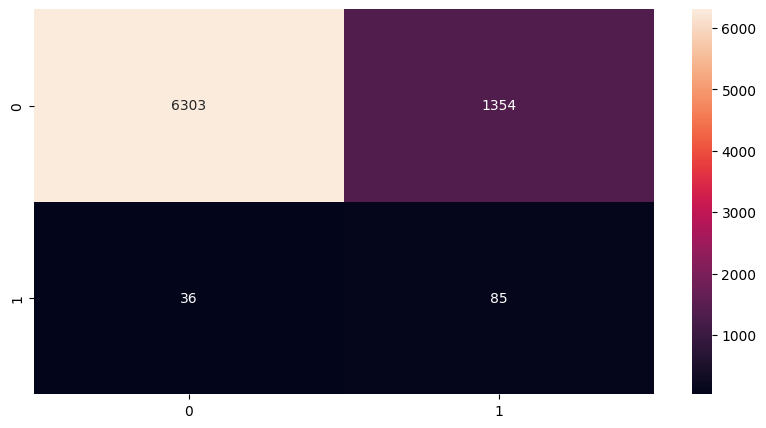

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, Y_pred_test), annot=True, fmt=".0f")

In [93]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      7657
         1.0       0.06      0.70      0.11       121

    accuracy                           0.82      7778
   macro avg       0.53      0.76      0.50      7778
weighted avg       0.98      0.82      0.89      7778



- True Positives (TP) for class 1.0: 85
- True Negatives (TN): 6303
- False Negatives (FN) for class 1.0: 36
- False Positives (FP) for class 1.0: 1354


In [94]:
total_data = 7778

n_class_0 = 7657
n_class_1 = 121

recall_class_0 = 0.82
recall_class_1 = 0.70

true_prediction_class_0 = n_class_0 * recall_class_0
true_prediction_class_1 = n_class_1 * recall_class_1

total_true_prediction = true_prediction_class_0 + true_prediction_class_1

model_accuracy = total_true_prediction / total_data
without_model_accuracy = n_class_0/total_data

print(f'Akurasi Model : {model_accuracy:.3f}')
print(f'Akurasi Tanpa Model : {without_model_accuracy:.3f}')

Akurasi Model : 0.818
Akurasi Tanpa Model : 0.984


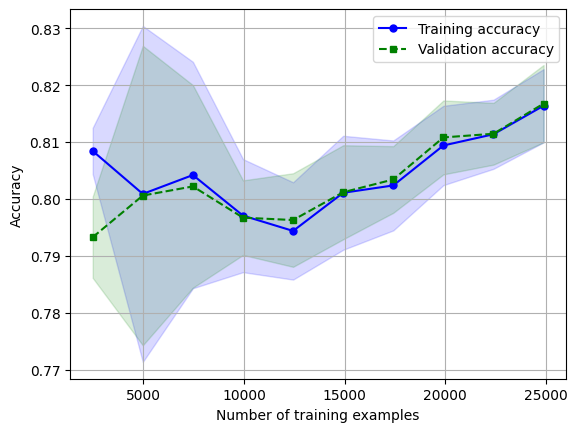

In [95]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define model and parameters
model = Pipeline ([
            ('scaler', scaler),
            ('balance', smote),
            ('clf', logreg)])
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_percentile, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Feature Importance

In [96]:
# Feature Importance
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances


,Attribute,Importance
3,agency_3,0.494120
5,product_name_1,0.475737
4,product_name_0,0.444052
6,product_name_2,0.394972
12,net_sales,0.198525
11,duration,0.019942
14,age,-0.073166
8,product_name_4,-0.074824
13,commision,-0.082207
9,agency_type_Travel Agency,-0.205405


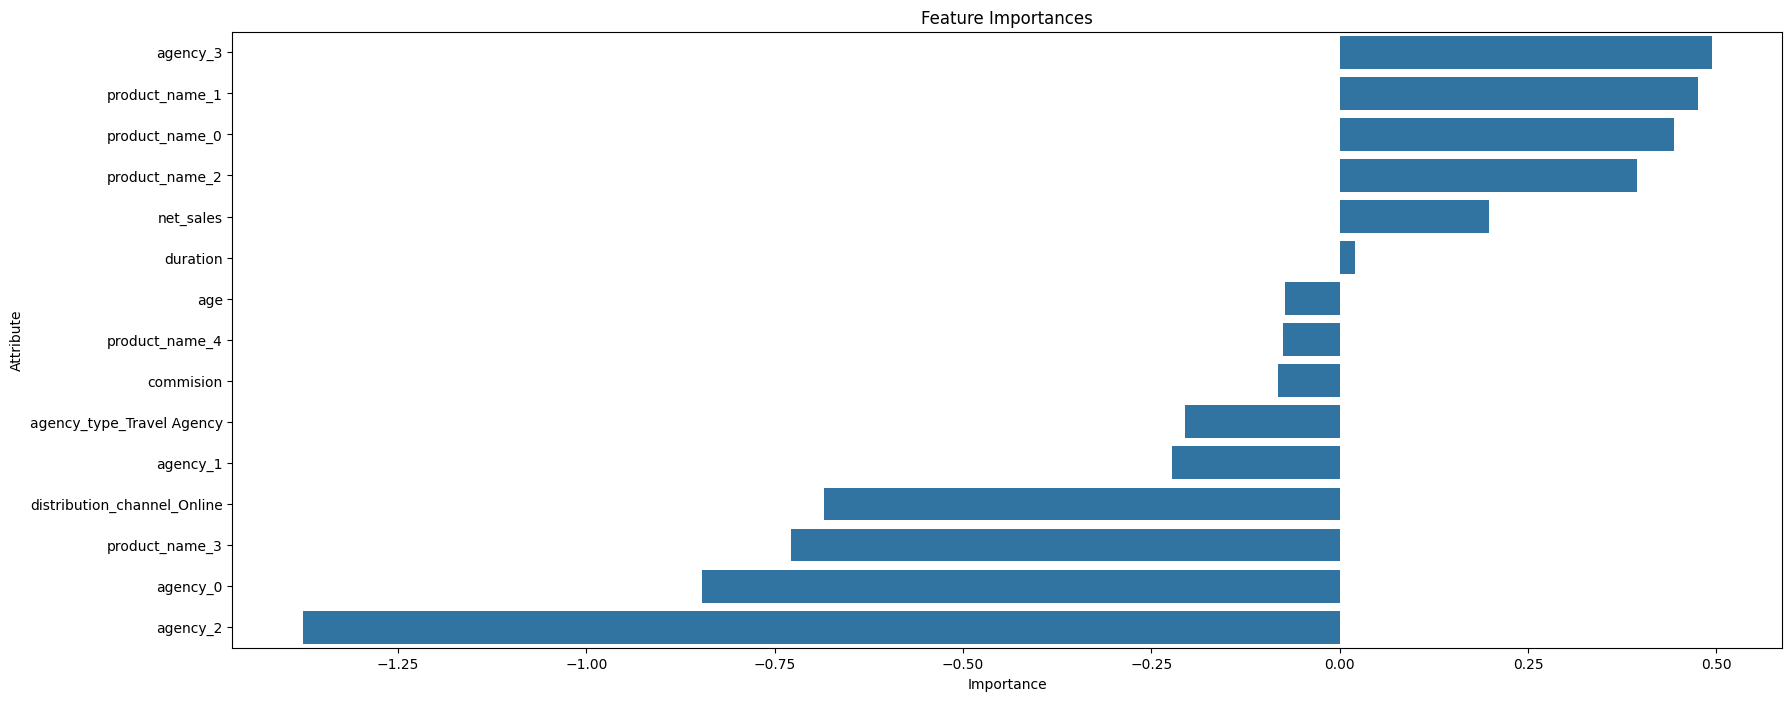

In [97]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Importance', y='Attribute', data=importances)
plt.title('Feature Importances')
plt.show()

Feature Importance menunjukkan bahwa beberapa fitur seperti agency_3, produk product_name_1, product_name_0, product_name_2, dan net_sales sangat penting untuk model, dengan agency_3 sebagai yang paling berpengaruh. Sementara itu, beberapa fitur seperti agency_0, agency_2,product_name_3, dan distribution_channel_online memiliki pengaruh negatif yang kuat Hal ini menunjukkan bahwa variabel target model paling dipengaruhi secara positif oleh agen dan produk tertentu, sementara dipengaruhi secara negatif oleh agen lain, produk tertentu, dan saluran distribusi online. 

## Analisis Bisnis dan Rekomendasi

**Kelebihan Model**:
- Model ini menunjukkan performa yang kuat dalam mengidentifikasi claim 'No' (kelas 0), dengan presisi 99% dan recall 82%. Hal ini mengindikasikan bahwa model sangat efektif dalam menghindari klaim palsu (tidak ada klaim) karena presisi tinggi pada kelas 0, yang berpotensi menghemat biaya operasional dan memastikan alokasi sumber daya yang efisien.

**Kelemahan Model**:
- Model ini memiliki kelemahan signifikan dalam mendeteksi klaim 'Yes' (kelas 1), dengan presisi yang sangat rendah sebesar 6%, menunjukkan banyaknya false positive yang terjadi. Recall untuk klaim yang terjadi adalah 70%. Selain itu, klaim yang tidak terdeteksi (30%) dapat menyebabkan ketidakpuasan pelanggan dan potensi kerugian finansial.

**Rekomendasi Perbaikan Model**:
   - Mengatasi false positive melalui feature engineering yang lebih baik.
   - Penyesuaian algoritma untuk meningkatkan akurasi prediksi.
   - Menerapkan metode ensemble untuk meningkatkan performa model.
   - Menggunakan lebih banyak data untuk pelatihan model.
   - Menerapkan teknik sampling yang berbeda, seperti gabungan SMOTE atau undersampling, untuk menangani ketidakseimbangan kelas.

Dengan mengimplementasikan rekomendasi-rekomendasi tersebut, model diharapkan dapat memberikan performa yang lebih baik dalam mengidentifikasi klaim asuransi perjalanan, meningkatkan efisiensi operasional serta kepuasan pelanggan, dan mengurangi risiko finansial.

## Save Model

In [98]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('smote', SMOTE(random_state=2024)),
    ('logreg', LogisticRegression(
        C=0.01,
        max_iter=400,
        penalty='l2',
        solver='liblinear'
    ))
])
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['agency', 'product_name']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['agency_type',
                                                   'distribution_channel']),
                                                 ('rob', RobustScaler(),
                                                  ['duration', 'net_sales',
                                                   'commision', 'age'])])),
                ('smote', SMOTE(random_state=2024)),
                ('logreg',
                 LogisticRegression(C=0.01, max_iter=400, solver='liblinear'))])

In [99]:
pickle.dump(final_pipeline, open('Erza_Anandhika_Capstone 3_Travel Insurance.sav', 'wb'))

## User Interface

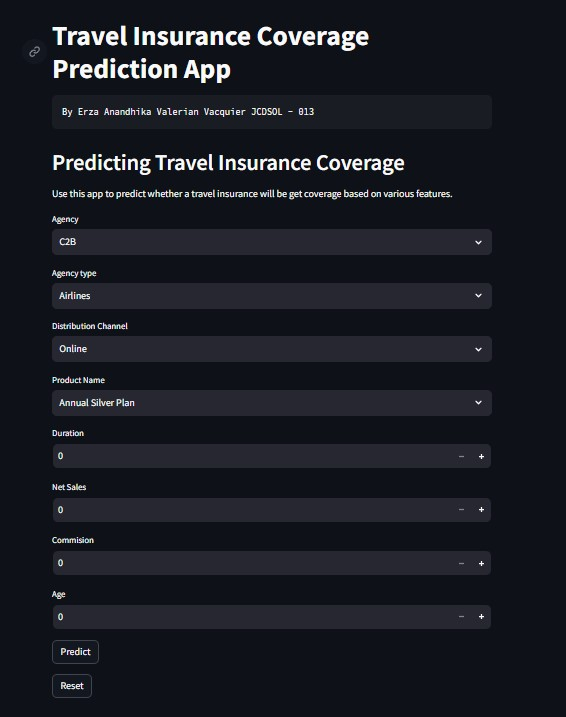

In [100]:
from IPython.display import Image, display
from PIL import Image as PILImage

image_path = r'C:\Users\USER\Purwadhika\UI.jpg'
display(Image(filename=image_path))